In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, roc_auc_score, RocCurveDisplay

In [3]:
tit = pd.read_csv(Path.cwd() / 'data' / 'titanic.csv')
tit.head(), tit.shape

(   Class    Age   Sex Survived
 0  First  Adult  Male      Yes
 1  First  Adult  Male      Yes
 2  First  Adult  Male      Yes
 3  First  Adult  Male      Yes
 4  First  Adult  Male      Yes,
 (2201, 4))

In [4]:
pd.crosstab(tit['Survived'], tit['Sex'], margins=True)

Sex,Female,Male,All
Survived,,,
No,126,1364,1490
Yes,344,367,711
All,470,1731,2201


In [5]:
pd.crosstab(tit['Survived'], tit['Class'], margins=True)

Class,Crew,First,Second,Third,All
Survived,,,,,
No,673,122,167,528,1490
Yes,212,203,118,178,711
All,885,325,285,706,2201


In [6]:
pd.crosstab(tit['Survived'], tit['Age'], margins=True)

Age,Adult,Child,All
Survived,,,
No,1438,52,1490
Yes,654,57,711
All,2092,109,2201


In [7]:
tit['Age'] = tit['Age'].replace({'Child':0, 'Adult':1})
tit['Sex'] = tit['Sex'].replace({'Male':0, 'Female':1})
tit['Class'] = tit['Class'].replace({'First':1, 'Second':2, 'Third':3, 'Crew':4})

In [8]:
tit.head()

,Class,Age,Sex,Survived
0,1,1,0,Yes
1,1,1,0,Yes
2,1,1,0,Yes
3,1,1,0,Yes
4,1,1,0,Yes


In [9]:
X = tit[['Class', 'Age', 'Sex']]
y = tit['Survived']
X, y

(      Class  Age  Sex
 0         1    1    0
 1         1    1    0
 2         1    1    0
 3         1    1    0
 4         1    1    0
 ...     ...  ...  ...
 2196      4    1    1
 2197      4    1    1
 2198      4    1    1
 2199      4    1    1
 2200      4    1    1
 
 [2201 rows x 3 columns],
 0       Yes
 1       Yes
 2       Yes
 3       Yes
 4       Yes
        ... 
 2196    Yes
 2197    Yes
 2198     No
 2199     No
 2200     No
 Name: Survived, Length: 2201, dtype: object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((1650, 3), (551, 3))

In [11]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10).fit(X_train, y_train)
tree.score(X_test, y_test)

0.7931034482758621

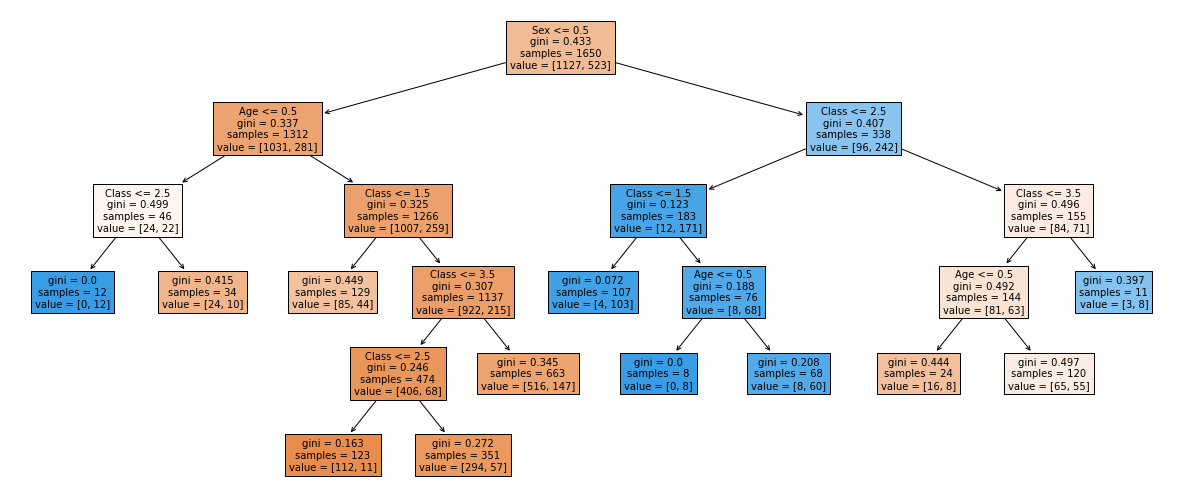

In [12]:
plt.figure(figsize=(21, 9))
plot_tree(tree, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [13]:
cu = pd.read_csv(Path.cwd() / 'data' / 'cusummary.csv', index_col=['Model'])
cu.head(), cu.shape

(                 Price Country  Reliability  Mileage   Type
 Model                                                      
 Acura Integra 4  11950   Japan  Much better      NaN  Small
 Dodge Colt 4      6851   Japan          NaN      NaN  Small
 Dodge Omni 4      6995     USA   Much worse      NaN  Small
 Eagle Summit 4    8895     USA       better     33.0  Small
 Ford Escort   4   7402     USA        worse     33.0  Small,
 (117, 5))

In [14]:
cu.isna().sum()

Price           0
Country         0
Reliability    32
Mileage        57
Type            0
dtype: int64

In [15]:
tit

,Class,Age,Sex,Survived
0,1,1,0,Yes
1,1,1,0,Yes
2,1,1,0,Yes
3,1,1,0,Yes
4,1,1,0,Yes
...,...,...,...,...
2196,4,1,1,Yes
2197,4,1,1,Yes
2198,4,1,1,No
2199,4,1,1,No


In [20]:
# DecisionTree와 RandomForest의 score가 동일 → 이런 경우에는 굳이 RF 사용할 필요 없는듯?
rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=10, random_state=0, n_jobs=-1).fit(X_train, y_train)
rf.score(X_test, y_test)

0.7931034482758621

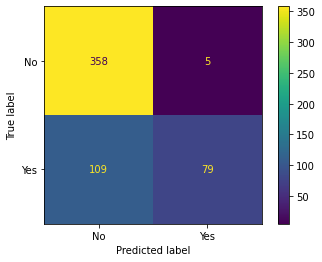

In [22]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)

In [24]:
tree.predict_proba(X_test)

array([[0.65891473, 0.34108527],
       [0.83760684, 0.16239316],
       [0.77828054, 0.22171946],
       ...,
       [0.77828054, 0.22171946],
       [0.77828054, 0.22171946],
       [0.54166667, 0.45833333]])

In [38]:
precision_score(y_test.values, tree.predict(X_test), average='weighted')

0.8259230739478838

In [40]:
roc_auc_score(y_test.values, tree.predict_proba(X_test)[:, 1], average='weighted')

0.7889777855928726

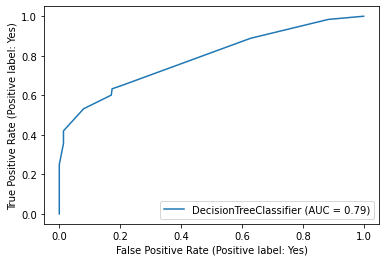

In [42]:
RocCurveDisplay.from_estimator(tree, X_test, y_test)

In [50]:
logreg = LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear').fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7894736842105263

In [51]:
logreg.coef_

array([[-0.32036449, -0.30832969,  1.90353794]])

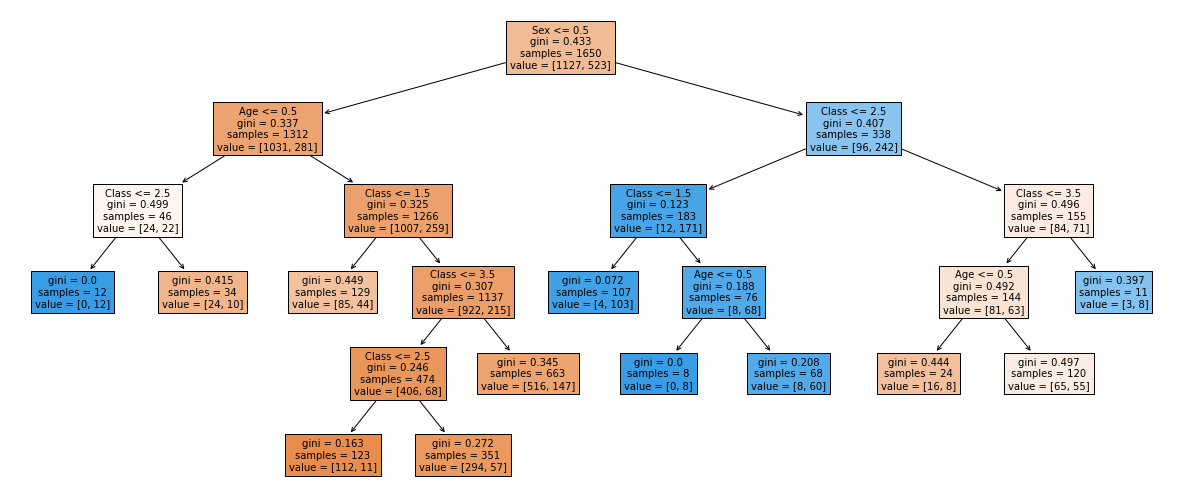

In [54]:
plt.figure(figsize=(21, 9))
plot_tree(tree, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()